<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebook/ak_bfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 2>/dev/null

In [2]:
from algorithmic_complexity.aclib import graphstuff as gs
import numpy as np
import networkx as nx

In [3]:
G = [[0, 0, 0, 1, 1, 0, 0, 0],
     [0, 0, 0, 1, 0, 1, 1, 0],
     [0, 0, 0, 0, 1, 1, 1, 0],
     [1, 1, 0, 0, 0, 0, 0, 1],
     [1, 0, 1, 0, 0, 0, 1, 0],
     [0, 1, 1, 0, 0, 0, 1, 1],
     [0, 1, 1, 0, 1, 1, 0, 0],
     [0, 0, 0, 1, 0, 1, 0, 0]]
G = np.array(G)

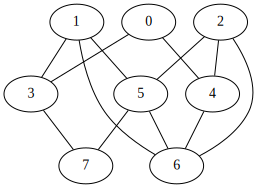

In [4]:
gs.as_gv(nx.from_numpy_matrix(G))

In [5]:
def bfsAM(G, s):
  n = len(G)
  queue = [s]
  path = [-1]*n
  visited = [False]*n
  visited[s] = True

  while queue:
    u = queue[0]
    for v in range(n):
      if G[u][v] == 1 and not visited[v]:
        visited[v] = True
        path[v] = u
        queue.append(v)

    del queue[0]

  return path

[3, 5, 5, 1, 2, -1, 5, 5]


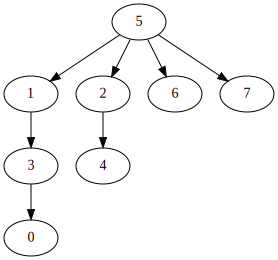

In [6]:
path = bfsAM(G, 5)
print(path)
gs.path2gv(path)

Time complexity of BFS for Adjacency Matrix is $O(V^2)$ V being the number of vertices.

## BFS for simple Adjavenct List

In [7]:
G = [[3, 4],
     [3, 5, 6],
     [4, 5, 6],
     [0, 1, 7],
     [0, 2, 6],
     [1, 2, 6, 7],
     [1, 2, 4, 5],
     [3, 5]]

In [8]:
def bfsAL(G, s):
  n = len(G)
  queue = [s]
  path = [-1]*n
  visited = [False]*n
  visited[s] = True

  while queue:
    u = queue[0]
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        path[v] = u
        queue.append(v)

    del queue[0]

  return path

[3, 5, 5, 1, 2, -1, 5, 5]


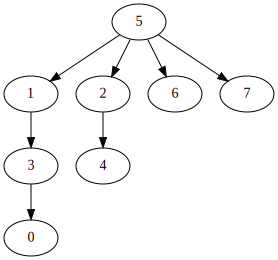

In [9]:
path = bfsAL(G, 5)
print(path)
gs.path2gv(path)

Time complexity of BFS for Adjacency Matrix is $O(V + E)$ V being the number of vertices and E is the numeber of edges.

In [10]:
%%file 1.adjlist
0 3 4
1 3 5 6
2 4 5 6
3 0 1 7
4 0 2 6
5 1 2 6 7
6 1 2 4 5
7 3 5

Overwriting 1.adjlist


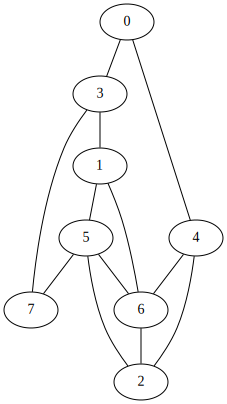

In [11]:
G = nx.read_adjlist('1.adjlist')
gs.as_gv(G)

## BFS on networkx graph

In [12]:
def bfs(G, s):
  queue = [s]
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['π'] = -1
  G.nodes[s]['visited'] = True
  while queue:
    u = queue[0]

    for v in G.neighbors(u):
      if not G.nodes[v]['visited']:
        G.nodes[v]['visited'] = True
        G.nodes[v]['π'] = u
        queue.append(v)

    del queue[0]

[3, 5, 5, 1, 2, -1, 5, 5]


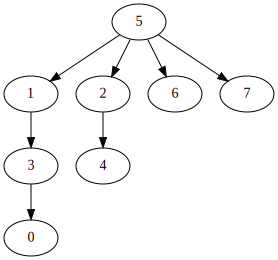

In [13]:
bfs(G, '5')
path = [0]*G.number_of_nodes()
for v, info in G.nodes.data():
  path[int(v)] = int(info['π'])

print(path)
gs.path2gv(path)